In [72]:
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
def plot_interpolation(dataframe, column_y, fontsize):
    servers = dataframe['server'].unique()
    clients = dataframe['client'].unique()

    for server in servers:
        for client in clients:
            client_server_data = dataframe[
                (dataframe['server'] == server) &
                (dataframe['client'] == client)
            ]

            if not client_server_data.empty:
                plt.figure(figsize=(50, 16))
                plt.plot(client_server_data['timestamp'], client_server_data[column_y], label=f'{client} - {server}')
                plt.xlabel('Timestamp', fontsize=fontsize)
                plt.ylabel(column_y, fontsize=fontsize)
                plt.title(f'Server: {server}, Client: {client}', fontsize=fontsize)
                plt.xticks(fontsize=fontsize)
                plt.yticks(fontsize=fontsize)
                plt.legend()
                plt.grid(True)
                plt.show()

def plot_scatter(dataframe, column_y, fontsize):
    servers = dataframe['server'].unique()
    clients = dataframe['client'].unique()

    for server in servers:
        for client in clients:
            client_server_data = dataframe[
                (dataframe['server'] == server) &
                (dataframe['client'] == client)
            ]

            if not client_server_data.empty:
                plt.figure(figsize=(50, 16))
                plt.scatter(client_server_data['timestamp'], client_server_data[column_y], label=f'{client} - {server}')
                plt.xlabel('Timestamp', fontsize=fontsize)
                plt.ylabel(column_y, fontsize=fontsize)
                plt.title(f'Server: {server}, Client: {client}', fontsize=fontsize)
                plt.xticks(fontsize=fontsize)
                plt.yticks(fontsize=fontsize)
                plt.legend()
                plt.grid(True)
                plt.show()


In [74]:
df_bitrate_test = pd.read_csv("data/bitrate_test.csv")
df_bitrate_train = pd.read_csv("data/bitrate_train.csv")
df_rtt_test = pd.read_csv("data/rtt_test.csv")
df_rtt_train = pd.read_csv("data/rtt_train.csv")

In [75]:
df_bitrate_train

client server   timestamp  bitrate
0          ba     ce  1717718915     3000
1          ba     ce  1717718916    66910
2          ba     ce  1717718916   294878
3          ba     ce  1717718916   351151
4          ba     ce  1717718916   329464
...       ...    ...         ...      ...
159025     rj     pi  1718163488   397971
159026     rj     pi  1718163488   302730
159027     rj     pi  1718163488   329908
159028     rj     pi  1718163488   378055
159029     rj     pi  1718163488   324403

[159030 rows x 4 columns]

In [76]:
df_bitrate_train.client.unique()

array(['ba', 'rj'], dtype=object)

In [77]:
df_bitrate_train.server.unique()

array(['ce', 'df', 'es', 'pi'], dtype=object)

In [78]:
print(df_bitrate_train.timestamp.unique())
len(df_bitrate_train.timestamp.unique())

[1717718915 1717718916 1717718917 ... 1718163486 1718163487 1718163488]


20782

In [79]:
print(df_bitrate_train.bitrate.unique())
print(len(df_bitrate_train.bitrate.unique()))

[  3000  66910 294878 ... 301766 397971 302730]
113178


In [80]:
# Calcular a média de bitrate por cliente
mean_bitrate_per_client = df_bitrate_train.groupby('client')['bitrate'].mean().reset_index()

# Renomear a coluna para indicar que é a média
mean_bitrate_per_client.columns = ['client', 'mean_bitrate']

# Exibir o resultado
display(mean_bitrate_per_client)


client   mean_bitrate
0     ba  316770.817248
1     rj  324535.140114

In [81]:
# Calcular a média de bitrate por cliente, servidor e timestamp
mean_bitrate_per_client_server_timestamp = df_bitrate_train.groupby(['client', 'server', 'timestamp'])['bitrate'].mean().reset_index()

# Renomear a coluna para indicar que é a média
mean_bitrate_per_client_server_timestamp.columns = ['client', 'server', 'timestamp', 'mean_bitrate']

# Exibir o resultado
display(mean_bitrate_per_client_server_timestamp)

client server   timestamp   mean_bitrate
0         ba     ce  1717718915    3000.000000
1         ba     ce  1717718916  286133.600000
2         ba     ce  1717718917  348626.333333
3         ba     ce  1717718918  368478.333333
4         ba     ce  1717719215    3000.000000
...      ...    ...         ...            ...
36192     rj     pi  1718163488  347711.166667
36193     rj     pi  1718206985    3000.000000
36194     rj     pi  1718206986  251011.800000
36195     rj     pi  1718206987  347158.000000
36196     rj     pi  1718206988  352451.333333

[36197 rows x 4 columns]

In [ ]:
plot_scatter(df_bitrate_train, "bitrate", fontsize=30)

In [ ]:
plot_scatter(mean_bitrate_per_client_server_timestamp, "mean_bitrate", fontsize=30)

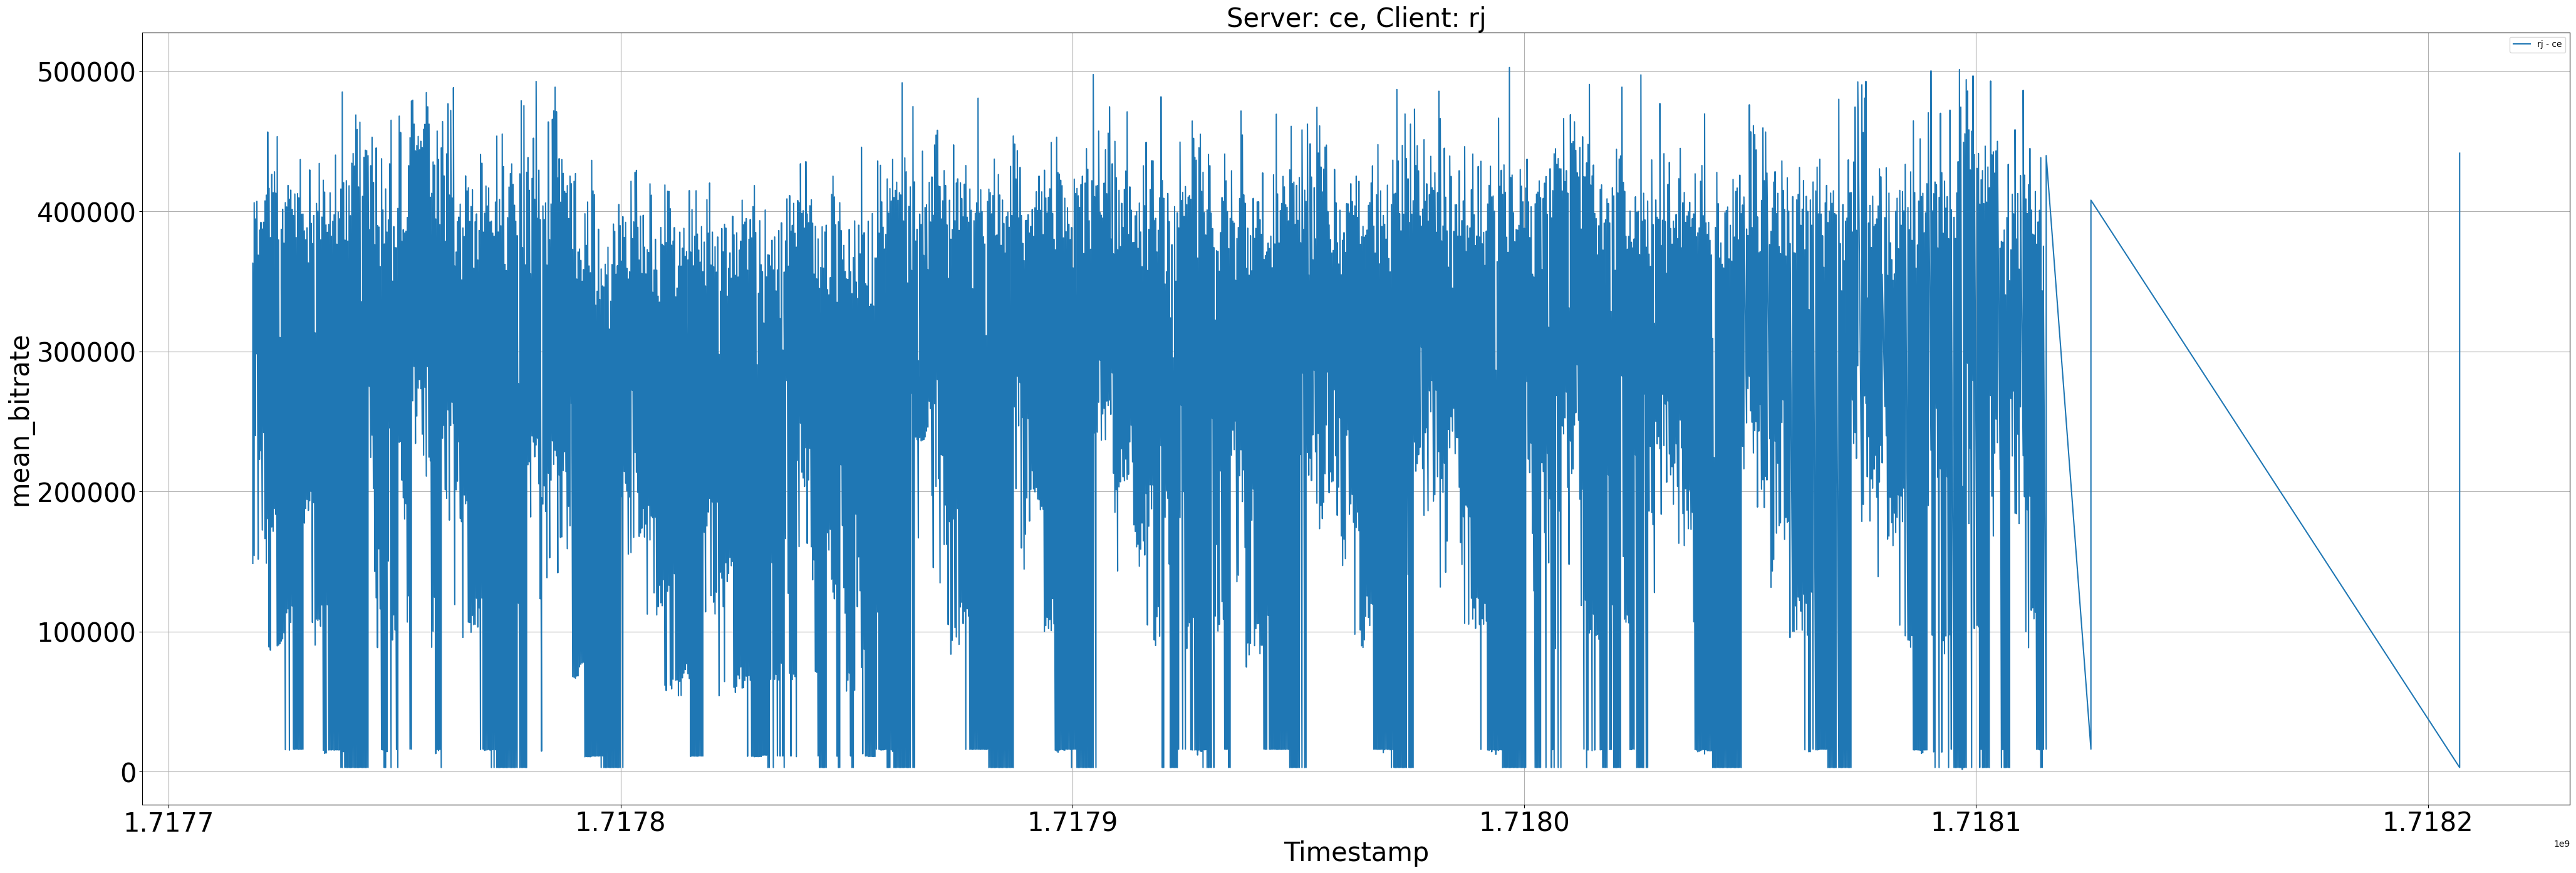

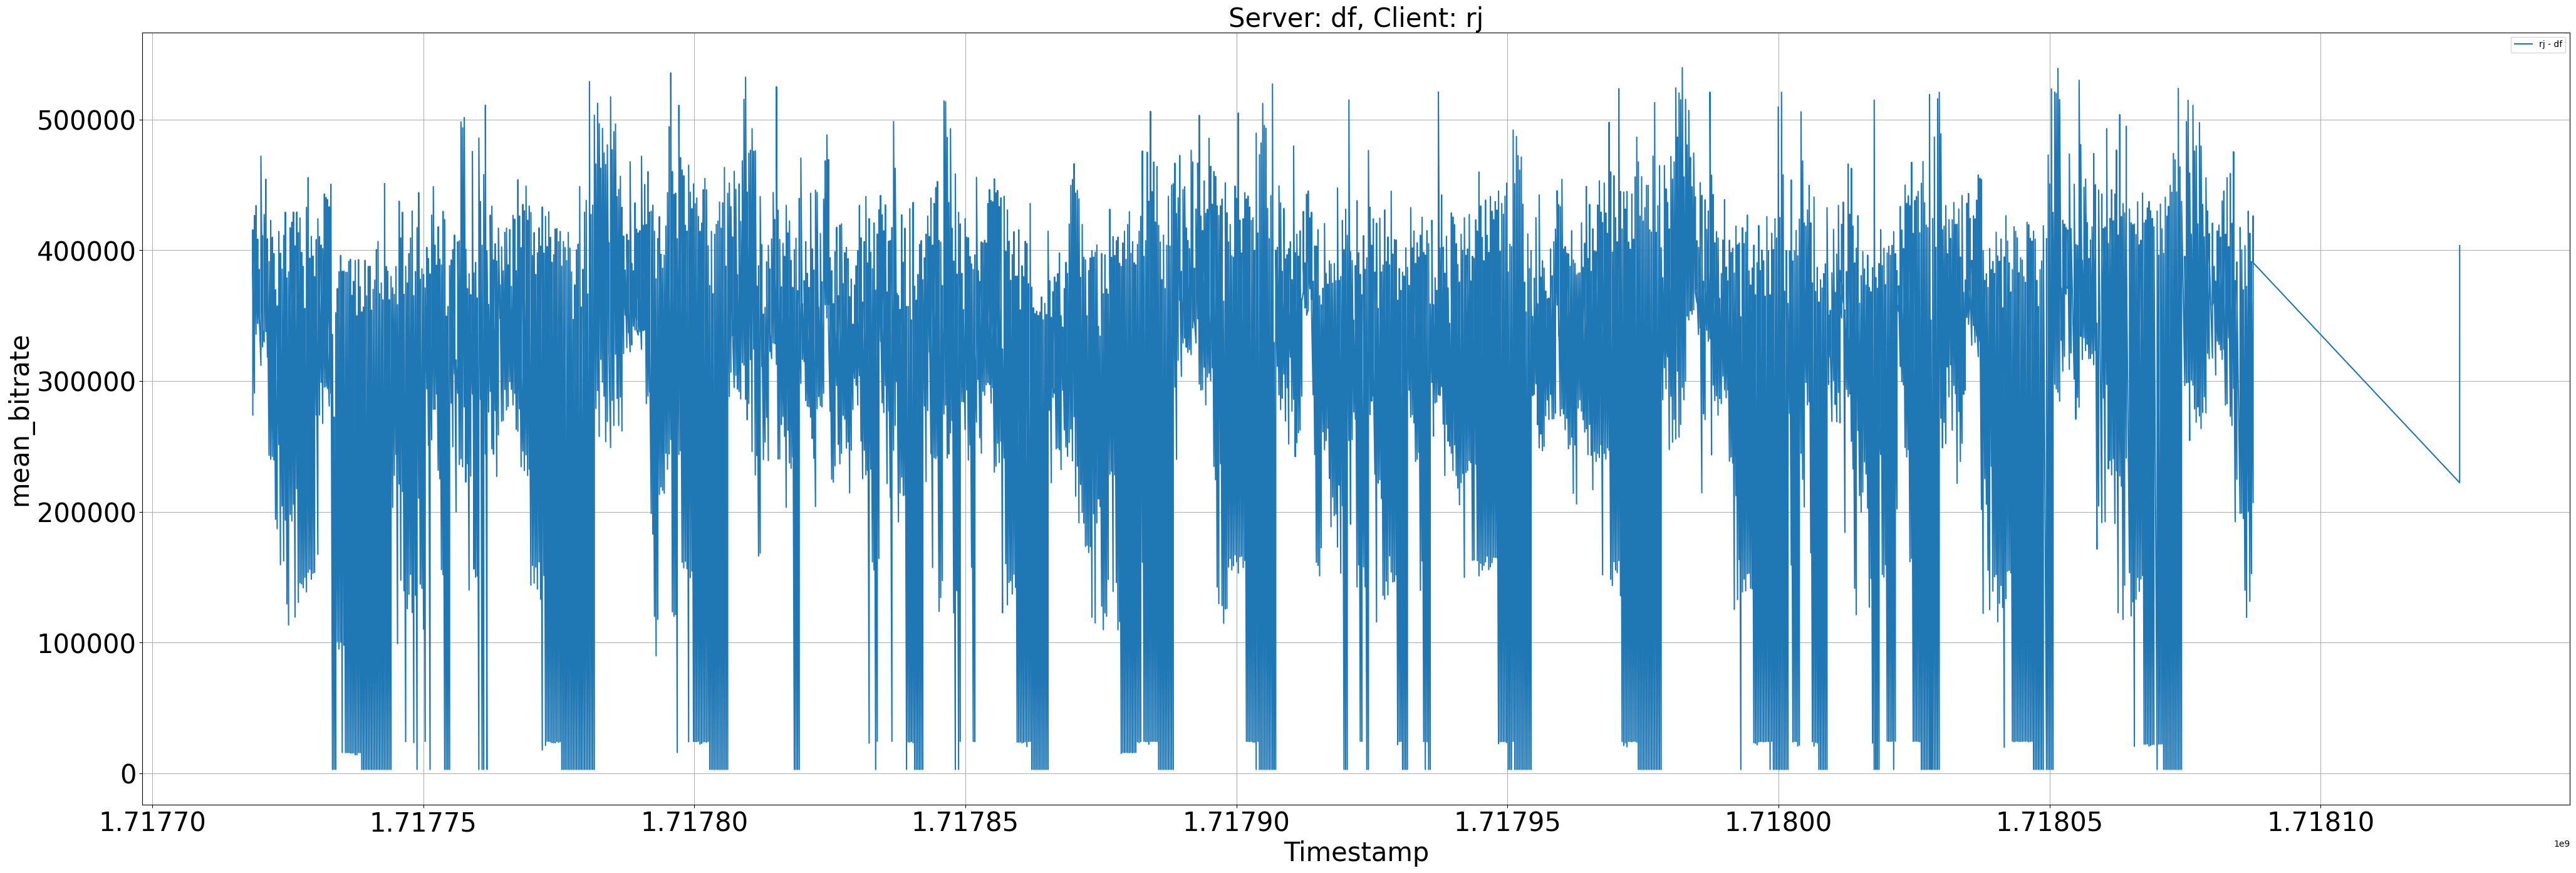

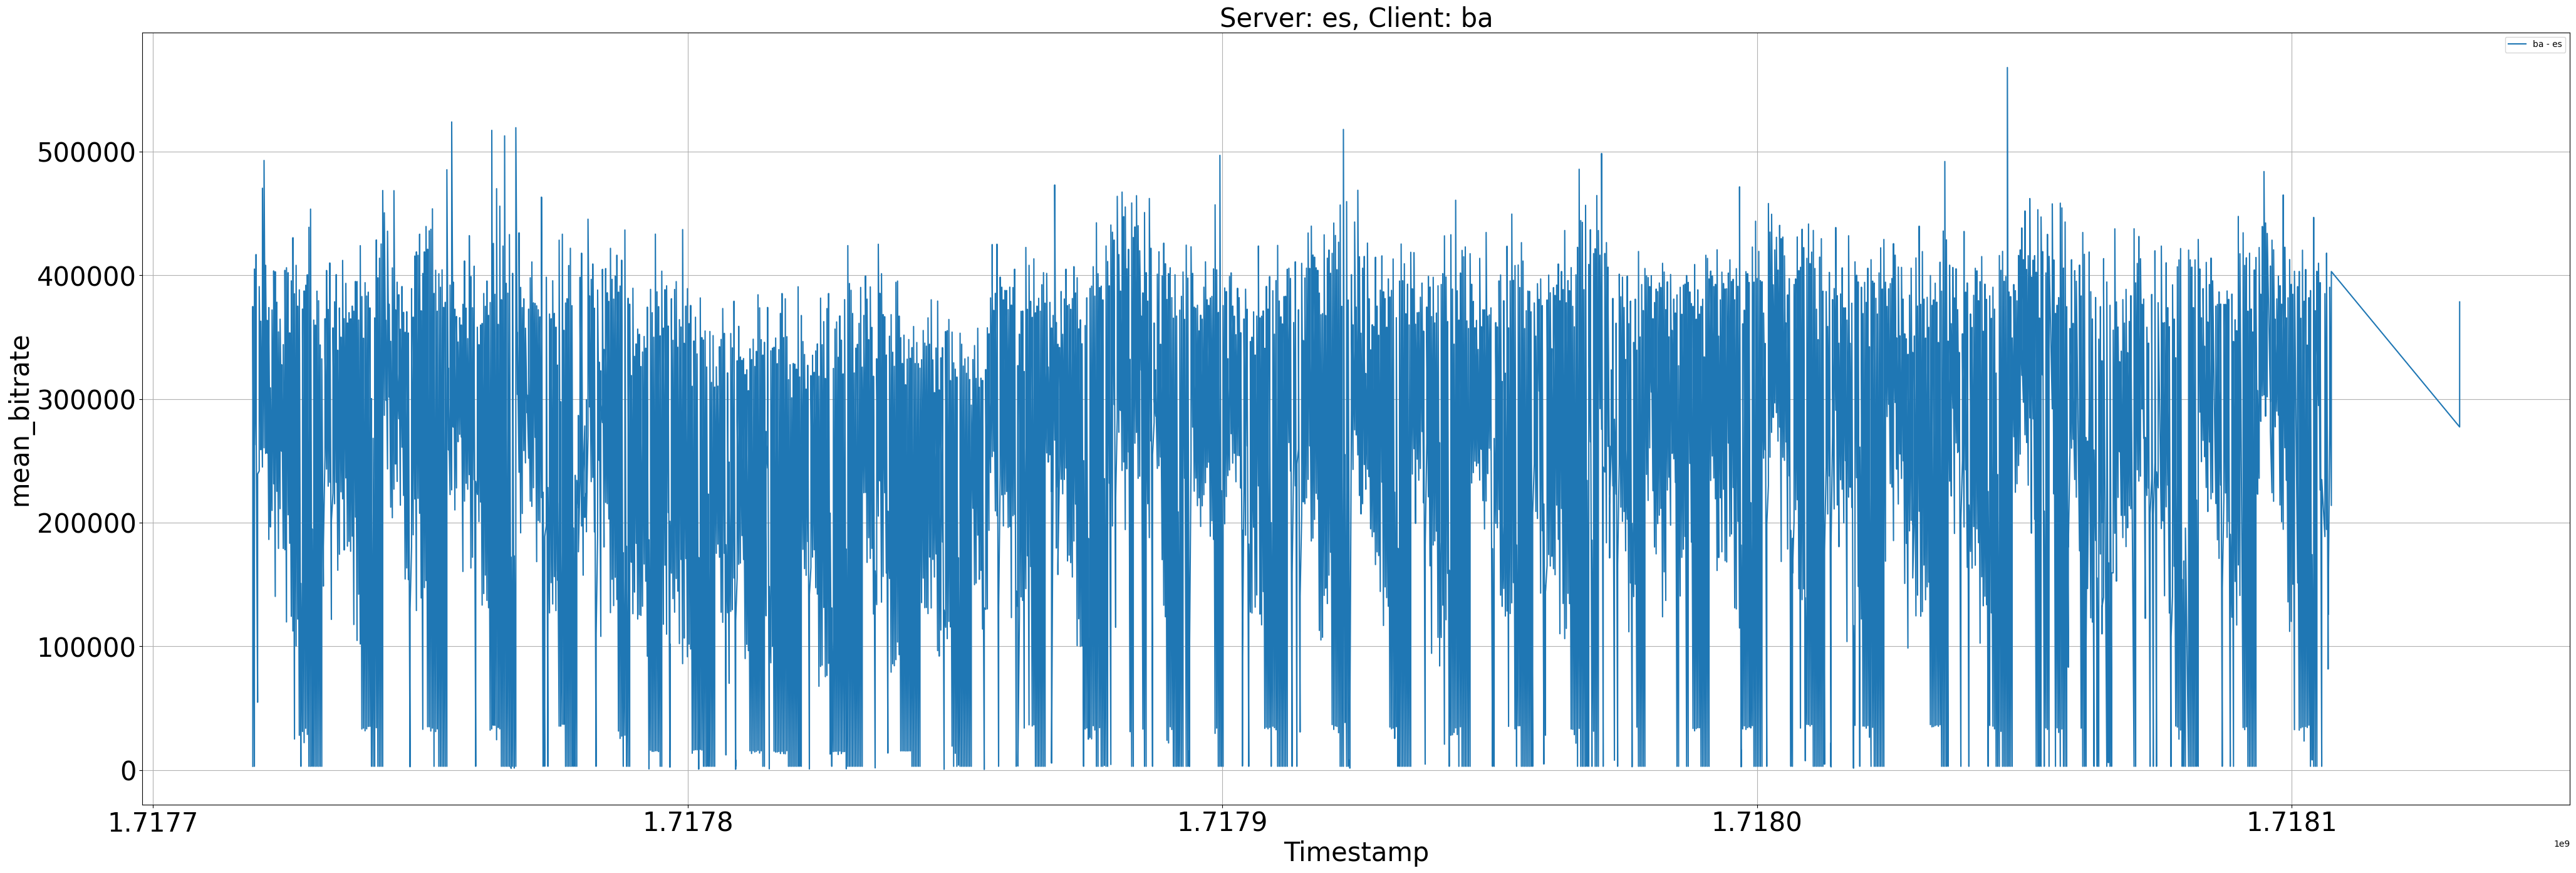

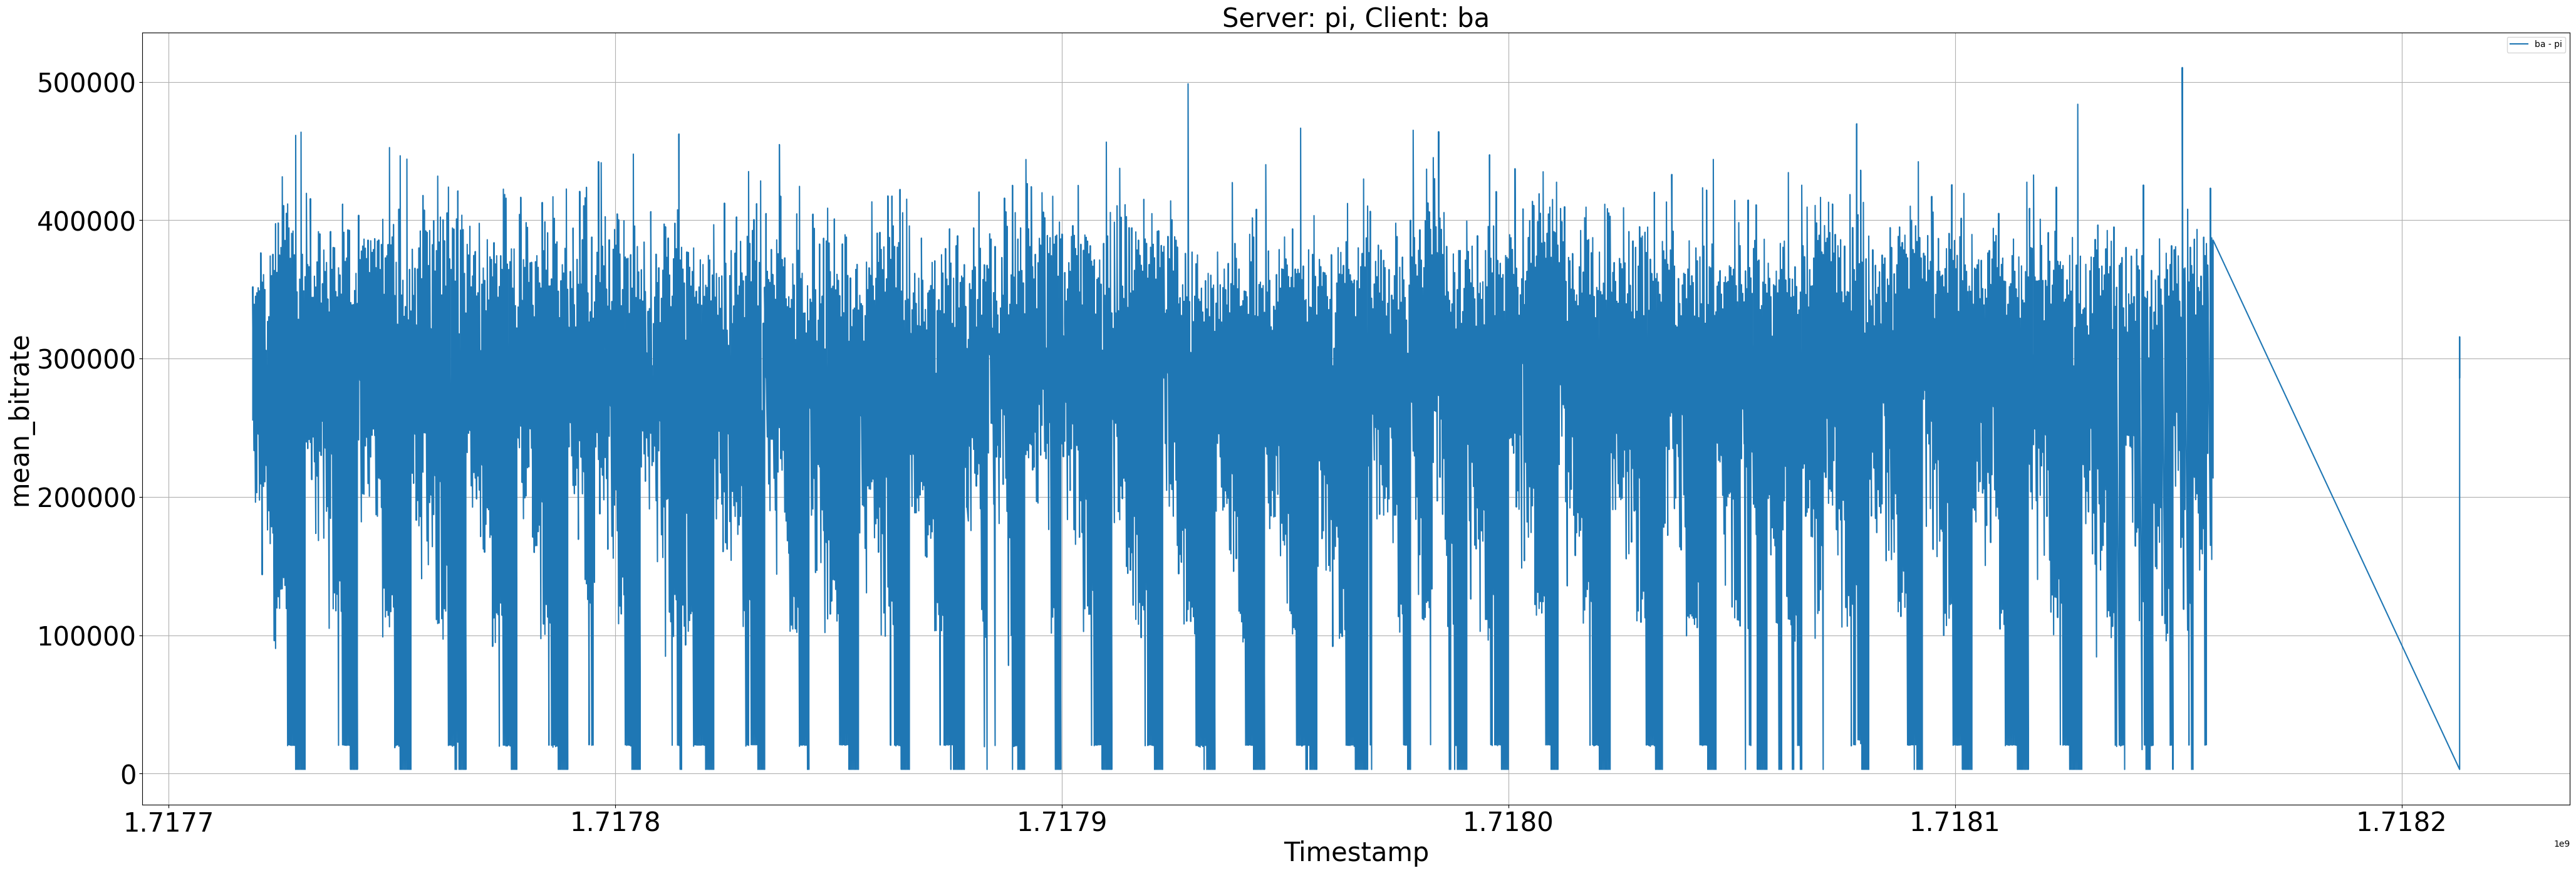

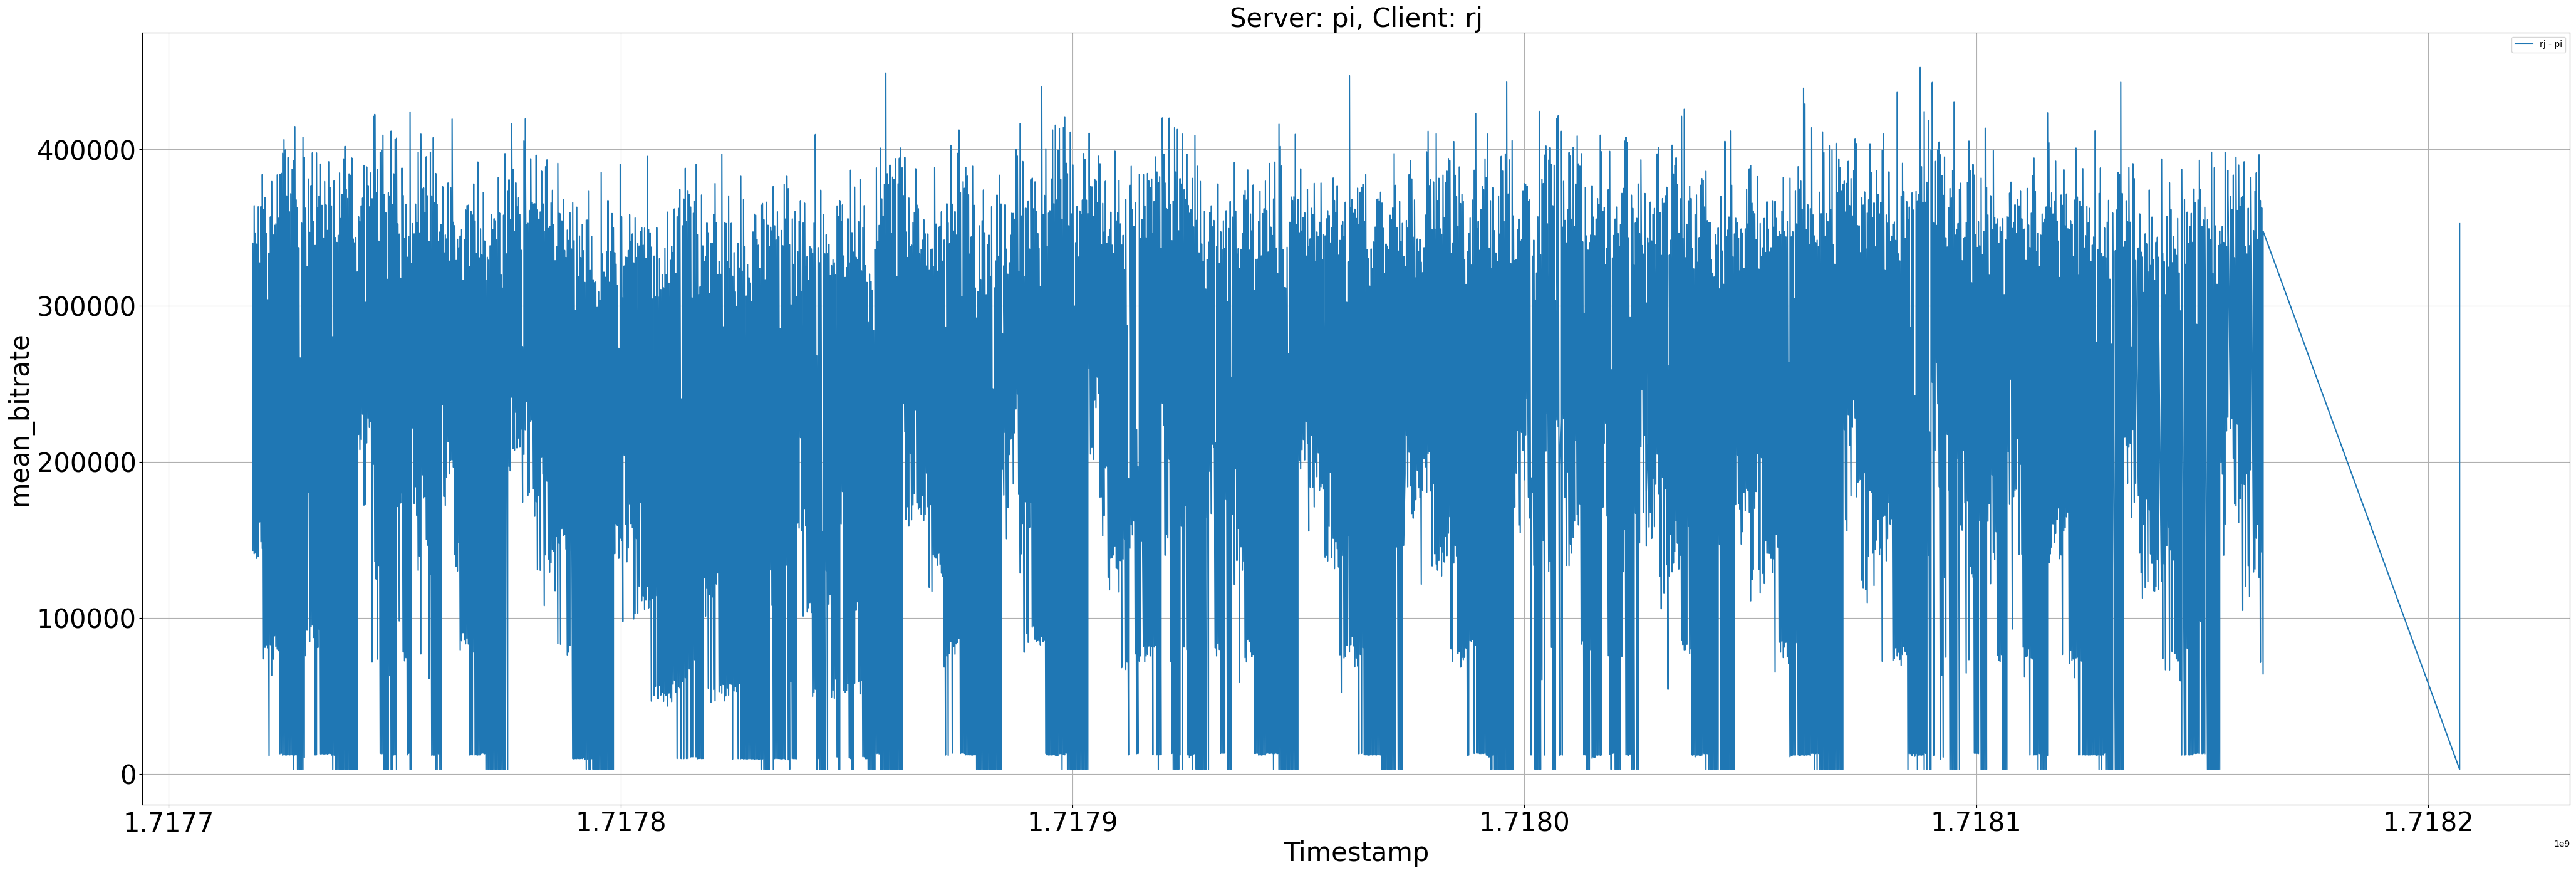

In [82]:
plot_interpolation(mean_bitrate_per_client_server_timestamp, "mean_bitrate", fontsize=30)